### How to use this file
Run the cell below. If you've never used Jupyter notebooks before, you can do this by putting your cursor in the cell and pressing shift+enter.


In [ ]:
# NREL Solar Cup Graphs
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
!git clone -q https://github.com/xelaphon/solar-cup.git
building_index = pd.read_csv("solar-cup/CSUN_Buildings_to_be_Analyzed.csv", header = 0,
                             names = ['energy_abbreviation','map_abbreviation', 'building_name'])
load_data = pd.read_csv("solar-cup/CSUN_15_min_kWh_Load_Data_V2.csv", low_memory = False)
building_numbers = np.empty((len(load_data.columns)-1), dtype="<U100")
for k in range(1, len(load_data.columns)):
  location = np.where(np.array(building_index['energy_abbreviation']) == load_data.columns[k].split('Total Electric Meter')[0].strip())
  if(len(location[0]) > 0):
    building_numbers[k-1] = (str(k-1) + " " + (building_index['building_name'][location[0][0]]).strip() + " " + load_data.columns[k].split('Total Electric Meter')[1].strip())
    print(building_numbers[k-1])
  else:
    building_numbers[k-1] = str(k-1) + " " + load_data.columns[k]
    print(building_numbers[k-1])
measurements = len(load_data['Timestamp'])
date_time = np.empty((measurements, 2), dtype="<U10")
for k in range(measurements):
  entry = load_data['Timestamp'][k].split(' ')
  date_time[k,0] = str(entry[0])
  date_time[k,1] = entry[1].split(':')[0] + ':' + entry[1].split(':')[1]
count_days = np.where(date_time[:,1] == '00:00')
days = len(count_days[0])
times = count_days[0][1] - count_days[0][0]
measured_buildings = len(load_data.columns) - 1 #not number of buildings, because many buildings have two columns
load_data_clean = np.zeros((measured_buildings, days, times)) #buildings, number of days, number of data points in a day
units = np.empty((measured_buildings), dtype="<U3")
for i in range(measured_buildings):
  year_position = 0
  current_building = np.array(load_data[load_data.columns[i+1]])
  for j in range(days):
    for k in range(times):
      value = current_building[year_position]
      if(type(value) == str and ('!' not in value)):
        load_data_clean[i][j][k] = float(value.split('k')[0])
        units[i] = "k" + value.split('k')[1]
      else:
        load_data_clean[i][j][k] = -1
      if(load_data_clean[i][j][k] >= 84000):
        load_data_clean[i][j][k] = -1
      if(j == 209 and k == 55):
        load_data_clean[i][j][k] = -1
      if(j == 209 and k == 54):
        load_data_clean[i][j][k] = -1
      if(i == 80 and j == 355 and k == 22):
        load_data_clean[i][j][k] = -1
      if(j == 30 and k >= 54 and k <= 59): #rows 2936 through 2941
        load_data_clean[i][j][k] = -1
      year_position += 1
def average_day(i):
  x_array = np.array([])
  y_array = np.array([])
  for k in range(times):
    sum = 0
    count = 0
    for j in range(days):
      if load_data_clean[i][j][k] != -1:
        sum += load_data_clean[i][j][k]
        count += 1
    if count != 0:
      x_array = np.append(x_array, date_time[k,1])
      y_array = np.append(y_array, sum/count)
  print("Average Max:", np.max(y_array))
  plt.figure(figsize=(20, 10))
  plt.title(building_numbers[i][2:])
  plt.ylabel(units[i])
  plt.plot(x_array, y_array)
  plt.xticks(np.arange(0, 95, 4), [date_time[0,1], date_time[4,1], date_time[8,1], date_time[12,1], date_time[16,1], date_time[20,1], date_time[24,1],
                                   date_time[28,1], date_time[32,1], date_time[36,1], date_time[40,1], date_time[44,1], date_time[48,1], date_time[52,1],
                                   date_time[56,1], date_time[60,1], date_time[64,1], date_time[68,1], date_time[72,1], date_time[76,1], date_time[80,1],
                                   date_time[84,1], date_time[88,1], date_time[92,1]])
def average_day_range(i, start_date, end_date):
  x_array = np.array([])
  y_array = np.array([])
  start_num = int(np.where(date_time[:,0] == "2022-" + start_date)[0][0] / 96)
  end_num = int(np.where(date_time[:,0] == "2022-" + end_date)[0][0] / 96)
  for k in range(times):
    sum = 0
    count = 0
    for j in range(start_num, end_num+1):
      if load_data_clean[i][j][k] != -1:

        sum += load_data_clean[i][j][k]
        count += 1
    if count != 0:
      x_array = np.append(x_array, date_time[k,1])
      y_array = np.append(y_array, sum/count)
  print("Average Max:", np.max(y_array))
  plt.figure(figsize=(20, 10))
  plt.title(building_numbers[i][2:])
  plt.ylabel(units[i])
  plt.plot(x_array, y_array)
  plt.xticks(np.arange(0, 95, 4), [date_time[0,1], date_time[4,1], date_time[8,1], date_time[12,1], date_time[16,1], date_time[20,1], date_time[24,1],
                                   date_time[28,1], date_time[32,1], date_time[36,1], date_time[40,1], date_time[44,1], date_time[48,1], date_time[52,1],
                                   date_time[56,1], date_time[60,1], date_time[64,1], date_time[68,1], date_time[72,1], date_time[76,1], date_time[80,1],
                                   date_time[84,1], date_time[88,1], date_time[92,1]])
def total_kWh(building):
  for k in range(times):
    sum = 0
    for j in range(days):
      if load_data_clean[building][j][k] != -1:
        sum += load_data_clean[building][j][k]
  return sum

fatal: destination path 'solar-cup' already exists and is not an empty directory.
0 Art and Design Center BACnet Demand (Raw)
1 Art and Design Center Usage
2 Arbor Grill BACnet Demand (Raw)
3 Arbor Grill Usage (C)
4 Bookstien Hall Demand (C)
5 Bookstien Hall Usage (C)
6 Bayramian Hall BACnet Demand (Raw)
7 Bayramian Hall Usage (Delta - C)
8 Bookstore (C) Usage (C)
9 Bookstore BACnet Demand (Raw)
10 Boeing Site Solar (Defunct) BACnet Demand
11 Donald Bianchi Planetarium BACnet Demand (Raw)
12 Donald Bianchi Planetarium Usage
13 Chapparral Hall Demand
14 Chapparral Hall Usage (C)
15 Citrus Hall Demand (C)
16 Citrus Hall Usage (C)
17 Cypress Hall Merged Demand
18 Cypress Hall Merged Usage (C)
19 Education Demand (C)
20 Education Usage (C)
21 Eucalyptus Hall Demand (C)
22 Eucalyptus Hall Usage (C)
23 Jacaranda Hall Demand (C)
24 Jacaranda Hall Usage (C)
25 Jerome Richfield Hall BACnet Demand (C)
26 Jerome Richfield Hall BACnet Usage (C)
27 Lilac Hall BACnet Demand
28 Lilac Hall Usage (C)
2

Choose a building from the list above. Change the value below to the corresponding number, then run the cell below.

In [ ]:
building = 45

Run the cell below to see an average day's energy usage. This averages data across the entire year.

Average Max: 14.143681318681324


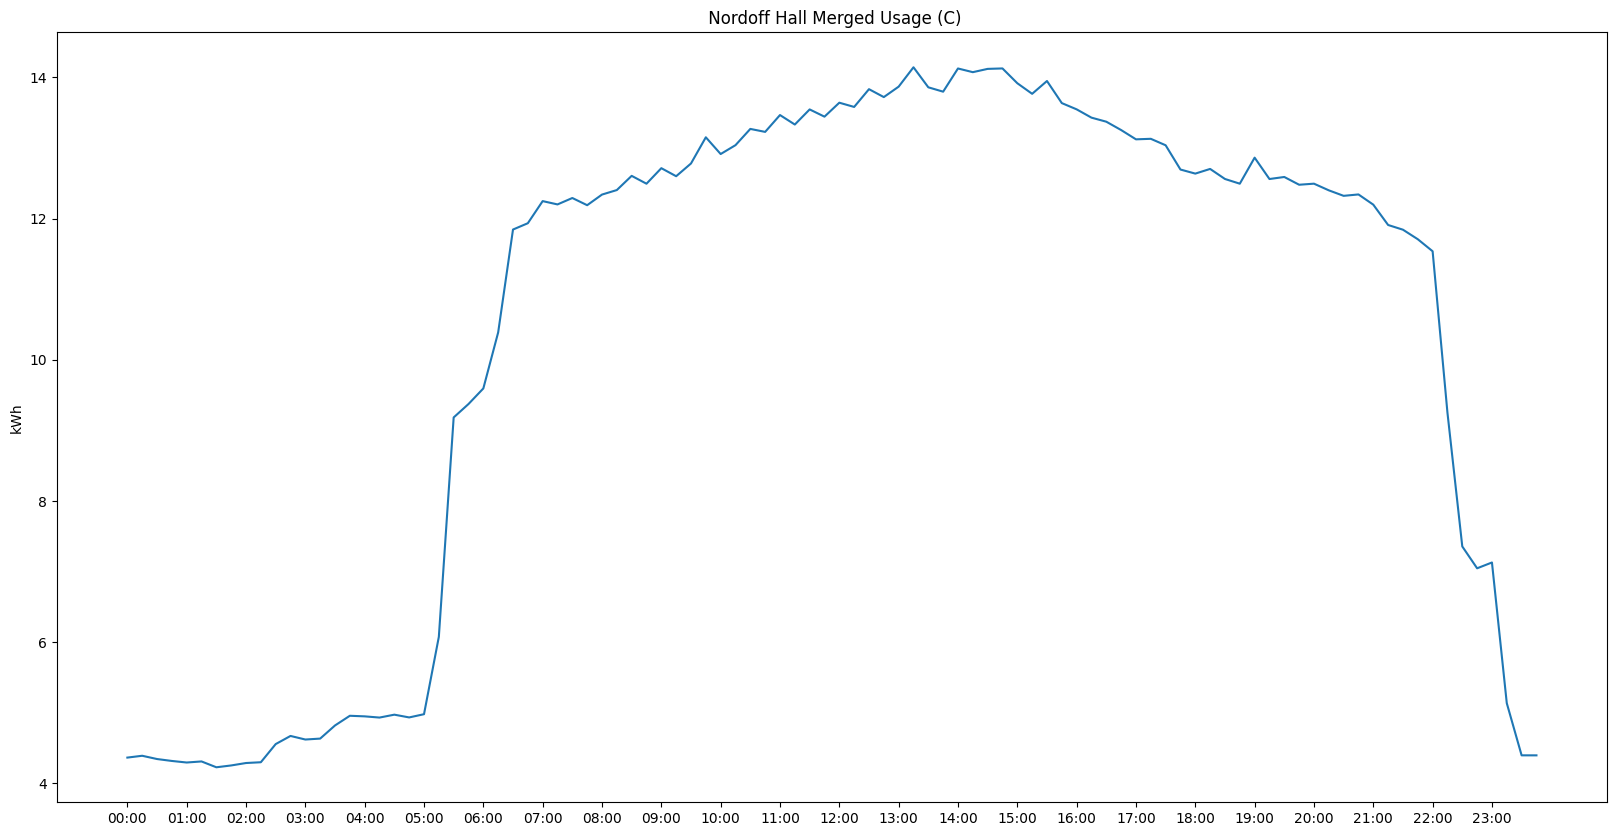

In [ ]:
average_day(building)

If you would like to see an average day across just a season, individual months, etc, set your starting and ending dates below. They must be in the format MM-DD.

In [ ]:
start_date = "05-30"
end_date = "08-30"

Average Max: 103.3586956521739


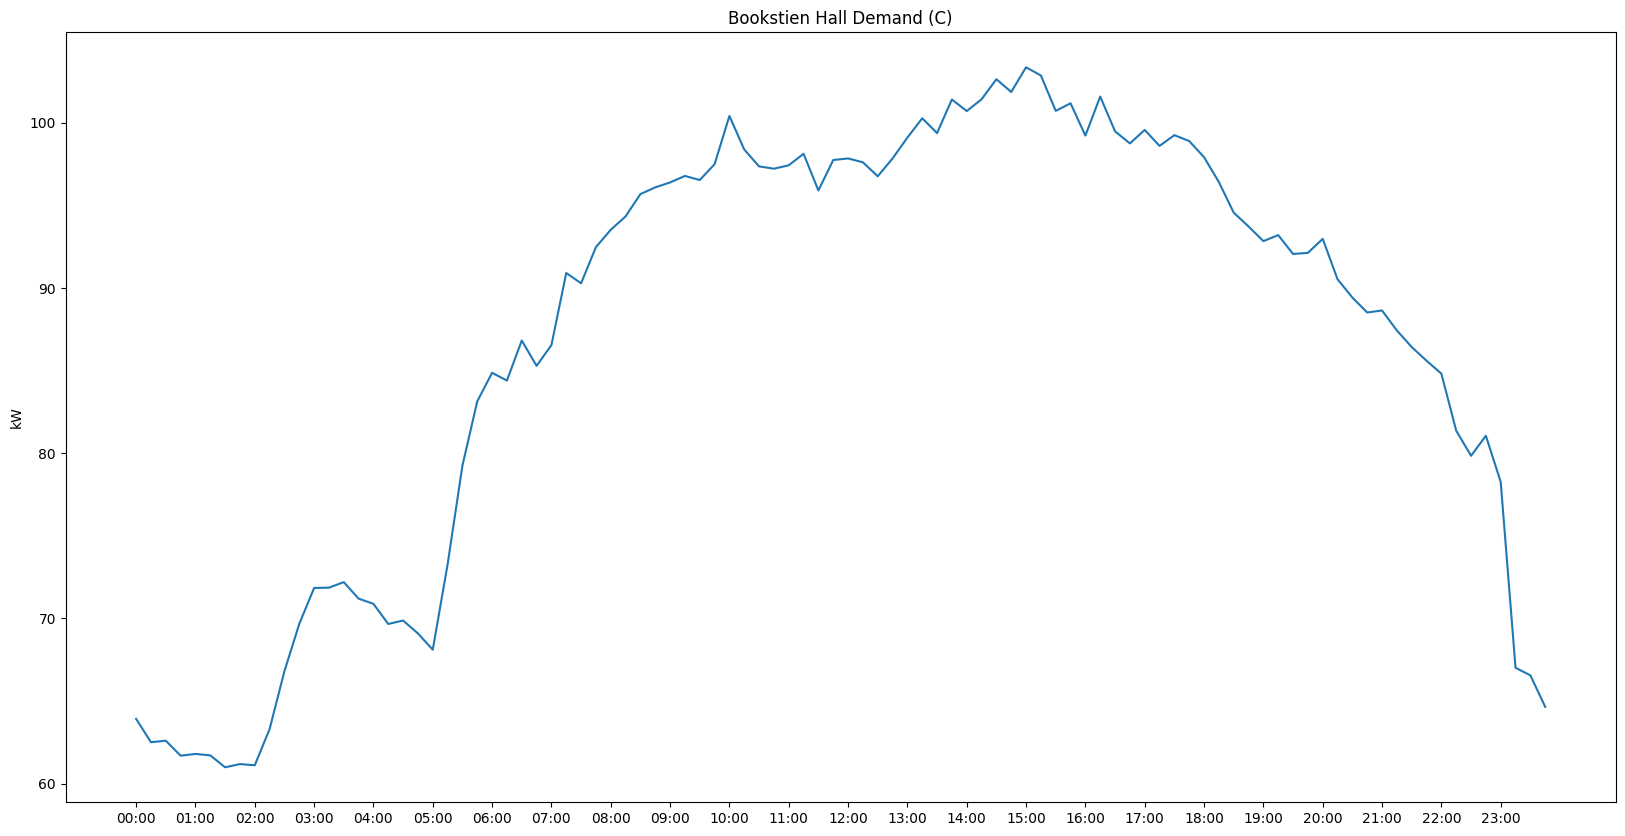

In [ ]:
average_day_range(building, start_date, end_date)

In [ ]:
for i in range(81):
  print(total_kWh(i))

21934.499999999996
5859.400000000014
4645.7
1330.7999999999984
22151.900000000005
5538.000000000003
32567.199999999993
8902.0
9890.0
24197.7
0.0
555.4000000000005
161.99999999999997
25911.700000000008
12614.09999999998
41977.59999999999
11130.599999999999
10468.49999999999
2747.2000000000016
23606.599999999995
5871.800000000006
40120.199999999975
10012.0
71151.49999999999
17709.699999999953
14105.900000000001
3466.600000000002
3487.3000000000025
892.4999999999994
28249.800000000003
7174.700000000015
60650.69999999999
16425.0
18675.400000000005
5021.1
0
21134.799999999992
5344.70000000001
302.500000000001
77.60000000000049
295.30000000000035
88.39999999999982
830.9999999999981
214.29999999999959
7381.2
1600.7999999999997
67738.70000000003
16634.0
0.0
-184.2
0
0
0.0
0.0
2922.4999999999986
729.4000000000013
16877.99999999999
4129.200000000014
20950.099999999988
5121.400000000009
8318.999999999995
2212.400000000003
7611.0
2163.899999999995
81474.90000000002
20352.0
0
33064.89999999998
7901

## Experimental

In [ ]:
def average_day_demand(i):
  x_array = np.array([])
  y_array = np.array([])
  for k in range(times):
    sum = 0
    count = 0
    for j in range(days):
      if load_data_clean[i][j][k] != -1:
        sum += load_data_clean[i][j][k]
        count += 1
    if count != 0:
      x_array = np.append(x_array, date_time[k,1])
      y_array = np.append(y_array, sum/count)
  print((building_numbers[i][2:]))
  print("Mean:", np.mean(y_array), 'kW')
  print("Average kWh Consumed in 24hrs:",np.mean(y_array)*24, 'kWh')
  print("Average kWh Consumed in Year:",np.mean(y_array)*24*365, 'kWh')

average_day_demand(building)

Bookstien Hall Demand (C)
Mean: 82.22604234532088 kW
Average kWh Consumed in 24hrs: 1973.425016287701 kWh
Average kWh Consumed in Year: 720300.1309450109 kWh


In [ ]:
#Check Assumptions:
def average_day_Usage(i):
  x_array = np.array([])
  y_array = np.array([])
  for k in range(times):
    sum = 0
    count = 0
    for j in range(days):
      if load_data_clean[i][j][k] != -1:
        sum += load_data_clean[i][j][k]
        count += 1
    if count != 0:
      x_array = np.append(x_array, date_time[k,1])
      y_array = np.append(y_array, sum/count)
  print((building_numbers[i][2:]))
  print("Average kWh per Day (NREL Data)", np.sum(y_array), 'kWh')
  print("Average kWh per Year (NREL Data)", np.sum(y_array)*365, 'kWh')

average_day_Usage(building)

Bookstien Hall Demand (C)
Average kWh per Day (NREL Data) 7893.700065150804 kWh
Average kWh per Year (NREL Data) 2881200.5237800437 kWh


In [ ]:
measurements

35040

In [ ]:
load_data["ADC Total Electric Meter Usage"][0]

'11.5kWh'

In [ ]:
load_data

,Timestamp,ADC Total Electric Meter BACnet Demand (Raw),ADC Total Electric Meter Usage,AR Total Electric Meter BACnet Demand (Raw),AR Total Electric Meter Usage (C),BB Total Electric Meter Demand (C),BB Total Electric Meter Usage (C),BH Total Electric Meter BACnet Demand (Raw),BH Total Electric Meter Usage (Delta - C),BK Total Electric Meter (C) Usage (C),...,SQ Total Electric Meter Usage (C),SRC Total Electric Meter Usage (C),ST Total Electric Meter BACnet Demand (C),ST Total Electric Meter BACnet Usage (C),SUC Total Electric Meter Usage (C),UN Total Electric Meter Merged Demand,UN Total Electric Meter Merged Usage (C),USU Total Electric Meter (M) Usage post-June 2017,USU Total Electric Meter (M) Usage pre-June 2017,VPAC Total Electric Meter Siemens Usage
0,2022-01-01 00:00:00 PST,47.0kW,11.5kWh,11.6kW,2.4kWh,44.4kW,11.1kWh,77.0kW,18.0kWh,60.6kWh,...,38.0kWh,70.5kWh,14.7kW,3.7kWh,NaN,42.1kW,10.0kWh,332.7kWh,NaN,32.0kWh
1,2022-01-01 00:15:00 PST,46.6kW,11.8kWh,12.0kW,2.4kWh,46.6kW,11.6kWh,78.0kW,20.0kWh,43.5kWh,...,39.0kWh,NaN,14.8kW,3.7kWh,NaN,41.0kW,10.0kWh,NaN,NaN,30.0kWh
2,2022-01-01 00:30:00 PST,48.1kW,11.8kWh,11.0kW,2.3kWh,48.9kW,12.2kWh,78.4kW,20.0kWh,45.0kWh,...,40.0kWh,NaN,14.6kW,3.7kWh,NaN,41.2kW,10.5kWh,NaN,NaN,28.0kWh
3,2022-01-01 00:45:00 PST,48.7kW,11.3kWh,7.5kW,2.3kWh,47.9kW,12.0kWh,78.8kW,20.0kWh,40.5kWh,...,39.0kWh,NaN,14.9kW,3.7kWh,NaN,40.8kW,10.0kWh,NaN,NaN,28.0kWh
4,2022-01-01 01:00:00 PST,48.3kW,12.0kWh,7.7kW,2.4kWh,48.5kW,12.1kWh,78.7kW,20.0kWh,41.5kWh,...,39.0kWh,70.9kWh,14.8kW,3.7kWh,NaN,40.9kW,10.5kWh,332.7kWh,NaN,28.0kWh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2022-12-31 22:45:00 PST,55.6kW,12.0kWh,10.0kW,2.9kWh,45.5kW,11.4kWh,75.7kW,18.0kWh,17.5kWh,...,66.0kWh,NaN,15.2kW,3.8kWh,NaN,38.9kW,9.5kWh,NaN,NaN,0.1kWh
35036,2022-12-31 23:00:00 PST,50.4kW,13.0kWh,12.4kW,2.9kWh,45.6kW,11.4kWh,74.9kW,17.0kWh,30.0kWh,...,32.0kWh,49.7kWh,15.2kW,3.8kWh,NaN,37.8kW,9.0kWh,219.3kWh,NaN,0.1kWh
35037,2022-12-31 23:15:00 PST,50.9kW,11.8kWh,15.2kW,3.1kWh,47.7kW,11.9kWh,74.0kW,18.0kWh,14.0kWh,...,33.0kWh,NaN,14.7kW,3.7kWh,NaN,38.2kW,9.0kWh,NaN,NaN,0.1kWh
35038,2022-12-31 23:30:00 PST,52.0kW,13.0kWh,12.4kW,3.0kWh,47.1kW,11.8kWh,77.0kW,35.0kWh,14.0kWh,...,33.0kWh,NaN,14.8kW,3.7kWh,NaN,39.4kW,9.0kWh,NaN,NaN,0.1kWh
